<a href="https://colab.research.google.com/github/Gugale123/Trafic_signal_recognizer/blob/main/shared_Copy_of_Traffic_Signal_Recognizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pathlib
import numpy as np
import matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
 
%matplotlib inline

In [ ]:
data_dir = '/content/drive/MyDrive/kaggle_dataset/gtsrb-german-traffic-sign'
train_path = '/content/drive/MyDrive/kaggle_dataset/gtsrb-german-traffic-sign/Train'
test_path = '/content/drive/MyDrive/kaggle_dataset/gtsrb-german-traffic-sign/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

**Finding the Total Number of categories**

In [ ]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure(0,figsize=(10,5))
unique_train,counts_train=np.unique(y_train,return_counts= True)
plt.bar(unique_train,counts_train)

plt.title('Training set class distribution',fontsize=20)
plt.tick_params(labelsize=16)

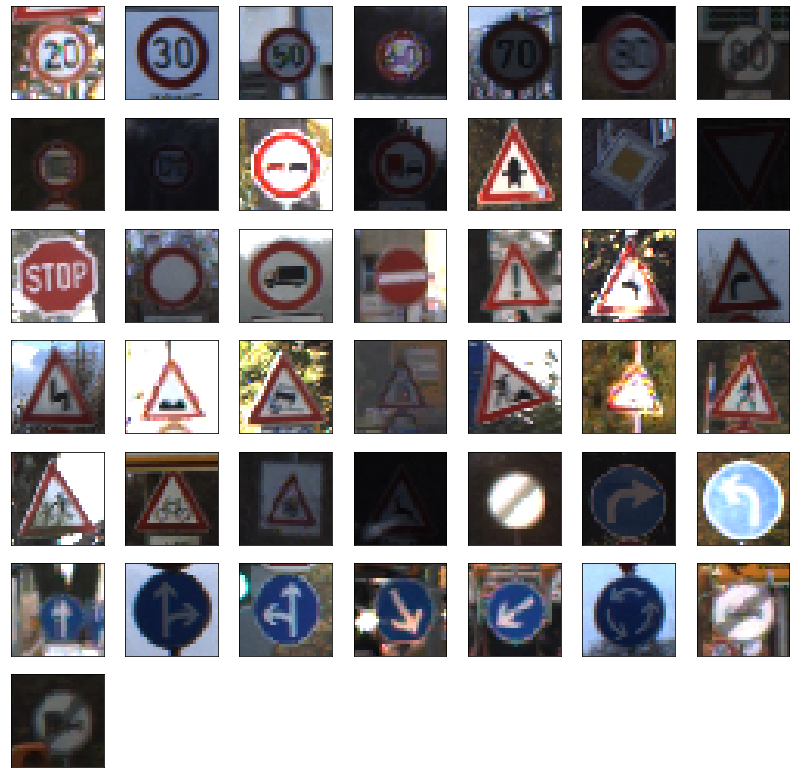

In [ ]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()
    

Now that we know the different types of signs...Lets categorize them and split them into Train and Test set!!

In [ ]:
def load_data(data_dir):
    '''
    Loading data from Train folder.
    
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels
        

In [ ]:
images, labels = load_data(train_path)

In [ ]:
labels1=labels.copy()

In [ ]:
# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_val, y_train, y_val = train_test_split(np.array(images), labels, test_size=0.4)

In [ ]:
x_train.shape,y_train.shape

((23525, 30, 30, 3), (23525, 43))

In [ ]:
x_val.shape,y_val.shape

((15684, 30, 30, 3), (15684, 43))

**Creating the Modelt**

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [ ]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [ ]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Fitting the model
EPOCHS = 30
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_val, y_val), 
                    epochs=EPOCHS, 
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 29s 467ms/step - loss: 9.5882 - accuracy: 0.0470 - val_loss: 3.7346 - val_accuracy: 0.0573
Epoch 2/30
60/60 [==============================] - 28s 466ms/step - loss: 3.7268 - accuracy: 0.0507 - val_loss: 3.7048 - val_accuracy: 0.0573
Epoch 3/30
60/60 [==============================] - 28s 464ms/step - loss: 3.6980 - accuracy: 0.0553 - val_loss: 3.6780 - val_accuracy: 0.0574
Epoch 4/30
60/60 [==============================] - 28s 463ms/step - loss: 3.6361 - accuracy: 0.0677 - val_loss: 3.4636 - val_accuracy: 0.0919
Epoch 5/30
60/60 [==============================] - 28s 465ms/step - loss: 3.4568 - accuracy: 0.1019 - val_loss: 3.3609 - val_accuracy: 0.1011
Epoch 6/30
60/60 [==============================] - 28s 464ms/step - loss: 3.2364 - accuracy: 0.1336 - val_loss: 2.5637 - val_accuracy: 0.2846
Epoch 7/30
60/60 [==============================] - 28s 466ms/step - loss: 2.4737 - accuracy: 0.2945 - val_loss: 2.0159 - val_accuracy: 0.4116

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set.

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)

print('validation set accuracy: ', accuracy * 100)

491/491 [==============================] - 6s 11ms/step - loss: 0.0760 - accuracy: 0.9834
validation set accuracy:  98.33588600158691


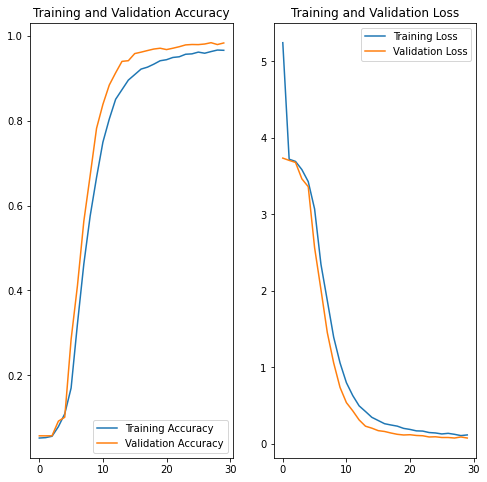

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predictions
Now, lets find the predictions on Test images!!

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test Data accuracy:  93.87173396674584


In [ ]:
#dictionary to label all traffic signs class.
class_labels = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
pred1=[]
for i in pred:
  pred1.append(class_labels[i])

In [ ]:
test_labels1=[]
for i in test_labels:
  test_labels1.append(class_labels[i])

Finally, lets visualize our awesome Predictions!!!

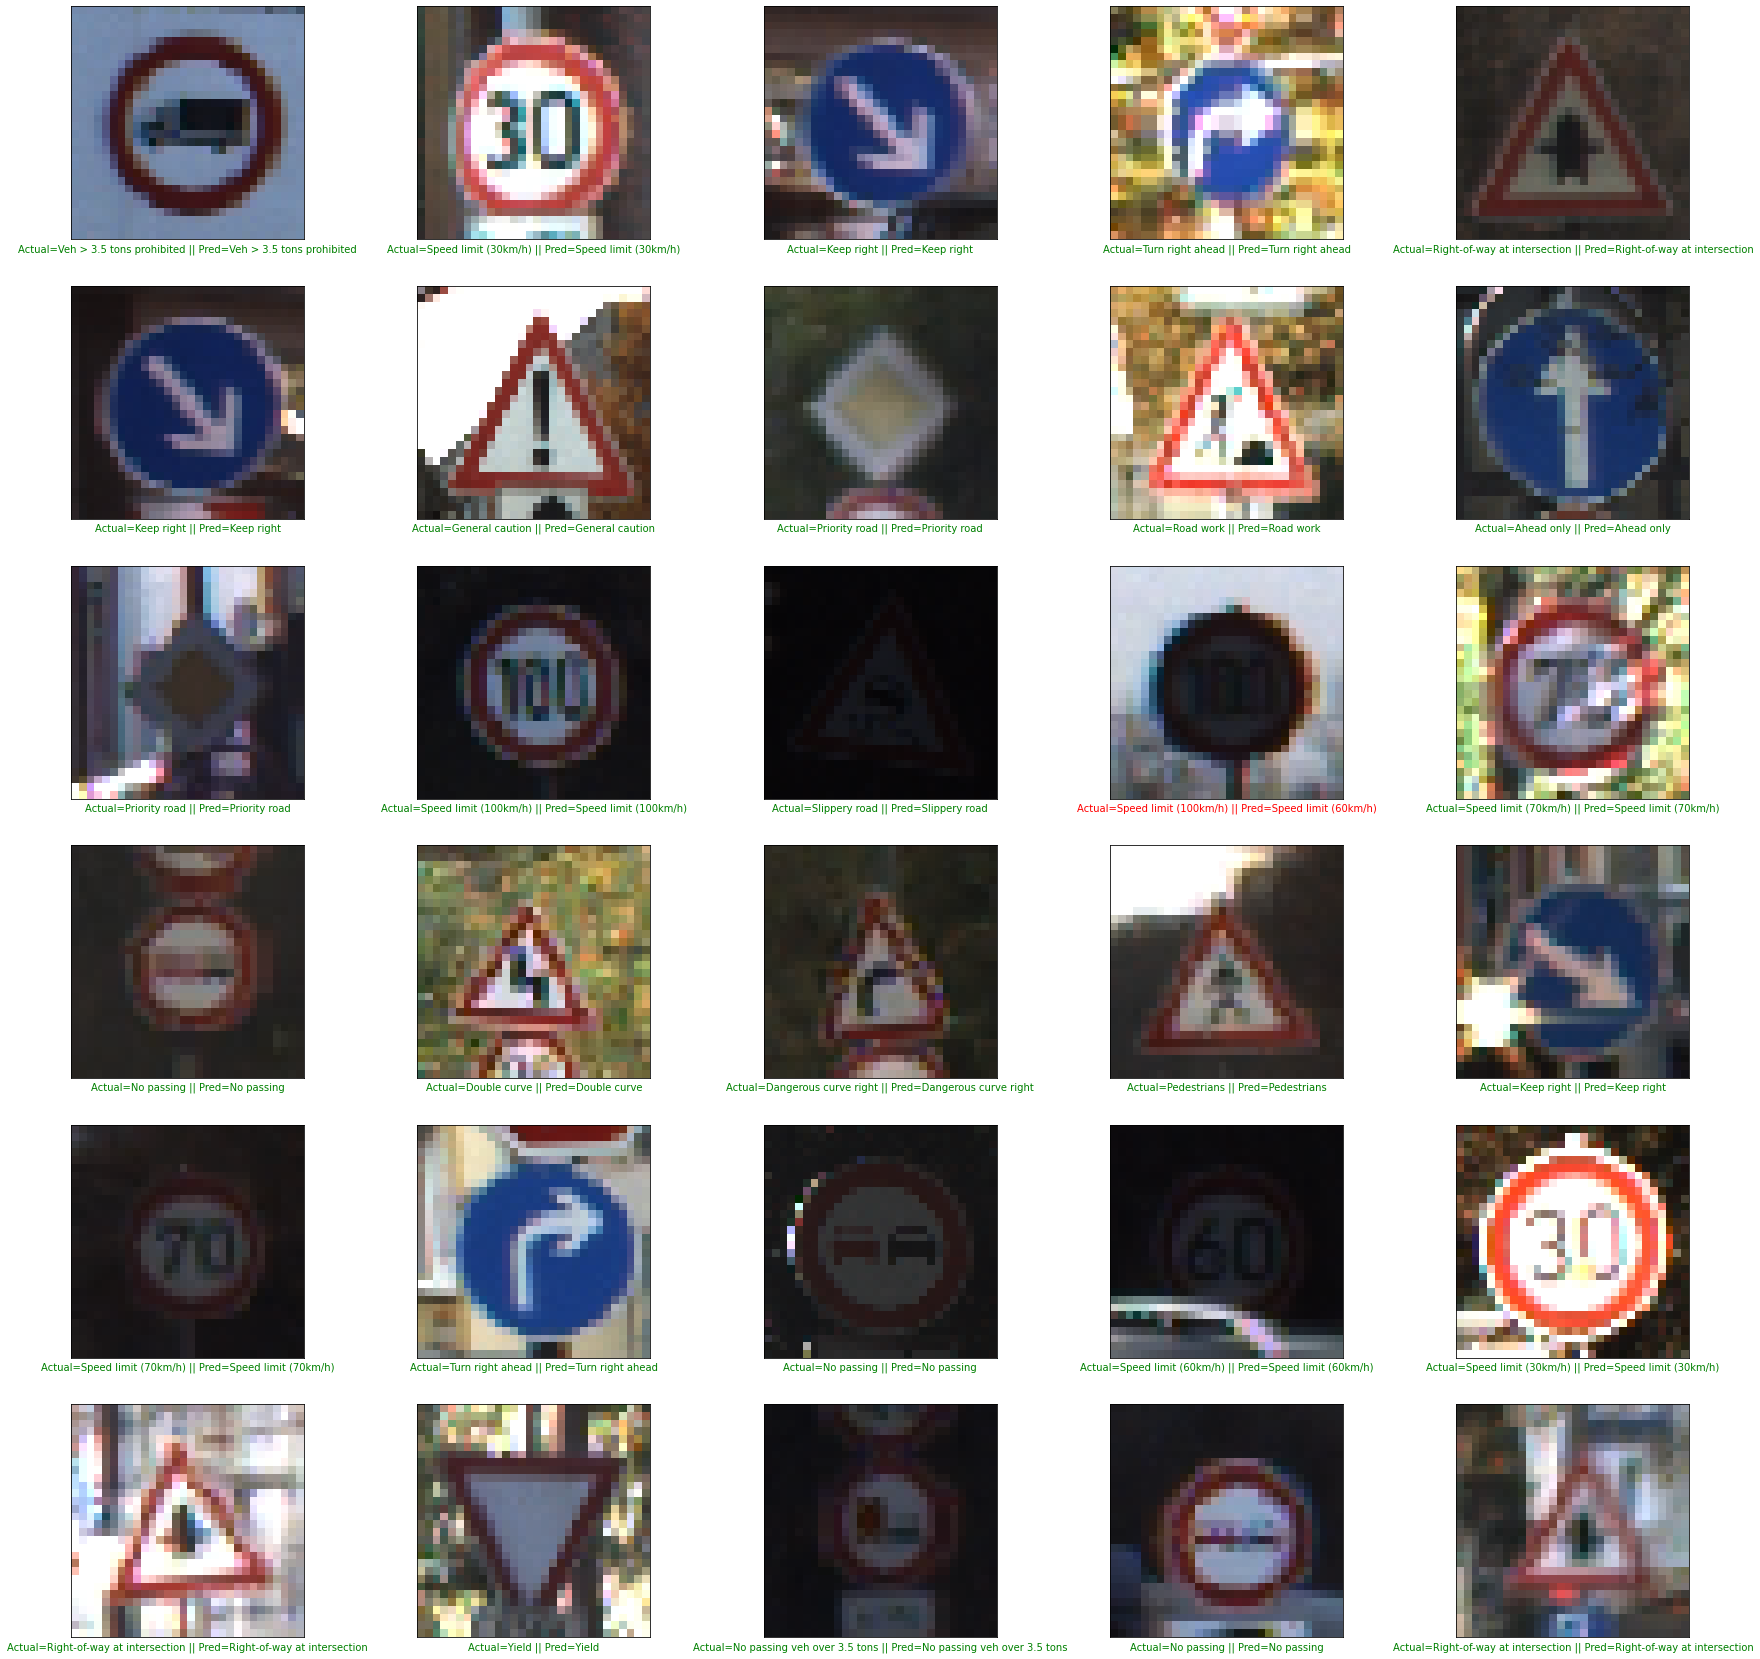

In [ ]:
plt.figure(figsize = (20, 20))

start_index = 0
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred1[start_index + i]
    actual = test_labels1[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
model.save('model-1.h5')

In [ ]:
Y_test=Y_test.iloc[:,6].values
print(Y_test)


[16  1 38 ...  6  7 10]


**check below**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_recall_fscore_support
report1=precision_recall_fscore_support(Y_test,pred)
cm = confusion_matrix(Y_test,pred)
print(cm)
print(accuracy scoreaccuracy_score(Y_test, pred))
a1=accuracy_score(Y_test, pred)
print(classification_report(Y_test,pred))

[[ 46   4   0 ...   0   0   0]
 [  6 699   2 ...   0   1   0]
 [  0  19 701 ...   0   0   0]
 ...
 [  0   0   0 ...  84   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  90]]
0.9387173396674584
              precision    recall  f1-score   support

           0       0.87      0.77      0.81        60
           1       0.94      0.97      0.95       720
           2       0.97      0.93      0.95       750
           3       0.87      0.92      0.90       450
           4       0.97      0.93      0.95       660
           5       0.89      0.89      0.89       630
           6       1.00      0.90      0.95       150
           7       0.89      0.86      0.88       450
           8       0.85      0.92      0.88       450
           9       0.97      0.96      0.97       480
          10       0.95      0.99      0.97       660
          11       0.92      0.96      0.94       420
          12       0.99      0.95      0.97       690
          13       0.99      0.9

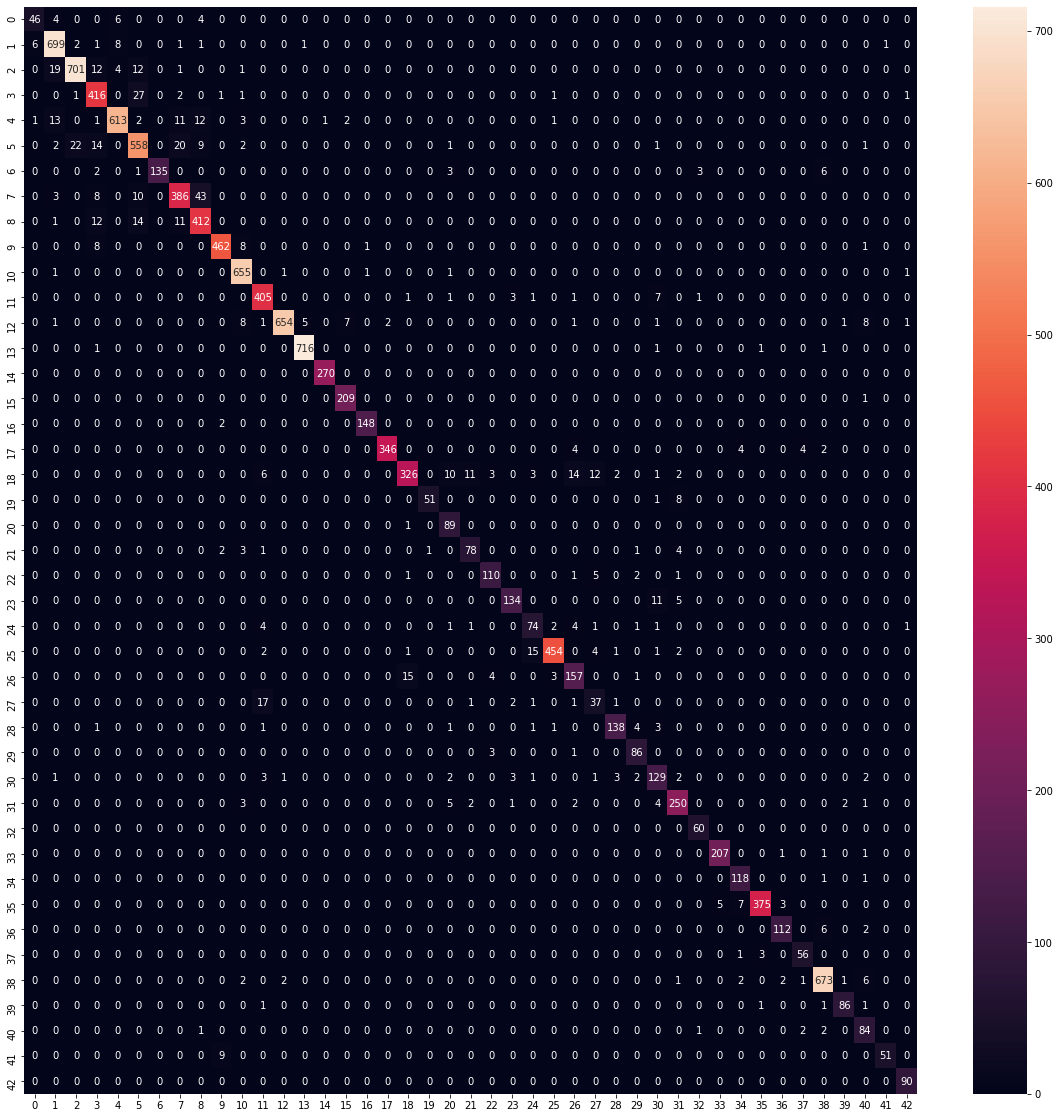

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True, fmt="d")


**k nearest neighbour**

In [ ]:
# Splitting the dataset into training and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(np.array(images), labels1, test_size=0.4)

In [ ]:
feature_extractor=model
x_train1=feature_extractor.predict(x_train1)
x_test1=feature_extractor.predict(x_test1)

In [ ]:
X_test1=feature_extractor.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier3.fit(x_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_recall_fscore_support
y_pred1 = classifier3.predict(X_test1)
report1=precision_recall_fscore_support(Y_test,y_pred1)
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
print(accuracy_score(Y_test, y_pred1))
a1=accuracy_score(Y_test, y_pred1)
print(classification_report(Y_test, y_pred1))

[[ 44   4   0 ...   0   0   0]
 [  6 698   4 ...   0   1   0]
 [  0   9 720 ...   0   0   0]
 ...
 [  0   1   0 ...  84   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  89]]
0.9377672209026128
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        60
           1       0.95      0.97      0.96       720
           2       0.92      0.96      0.94       750
           3       0.87      0.92      0.89       450
           4       0.97      0.94      0.95       660
           5       0.88      0.88      0.88       630
           6       1.00      0.87      0.93       150
           7       0.94      0.84      0.89       450
           8       0.87      0.91      0.89       450
           9       0.96      0.97      0.97       480
          10       0.96      0.99      0.97       660
          11       0.92      0.96      0.94       420
          12       1.00      0.94      0.97       690
          13       0.99      0.9

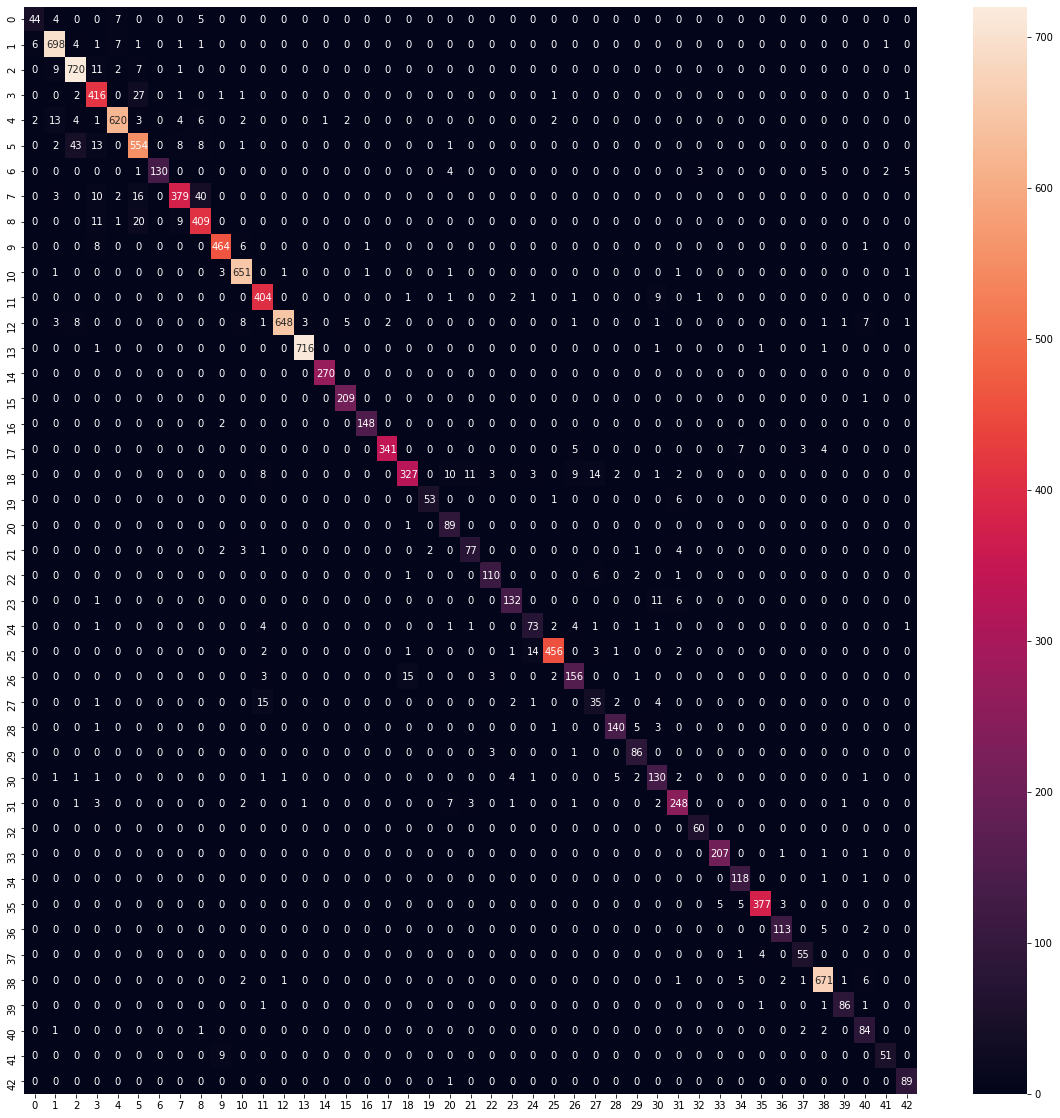

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
pred2=[]
for i in y_pred1:
  pred2.append(class_labels[i])

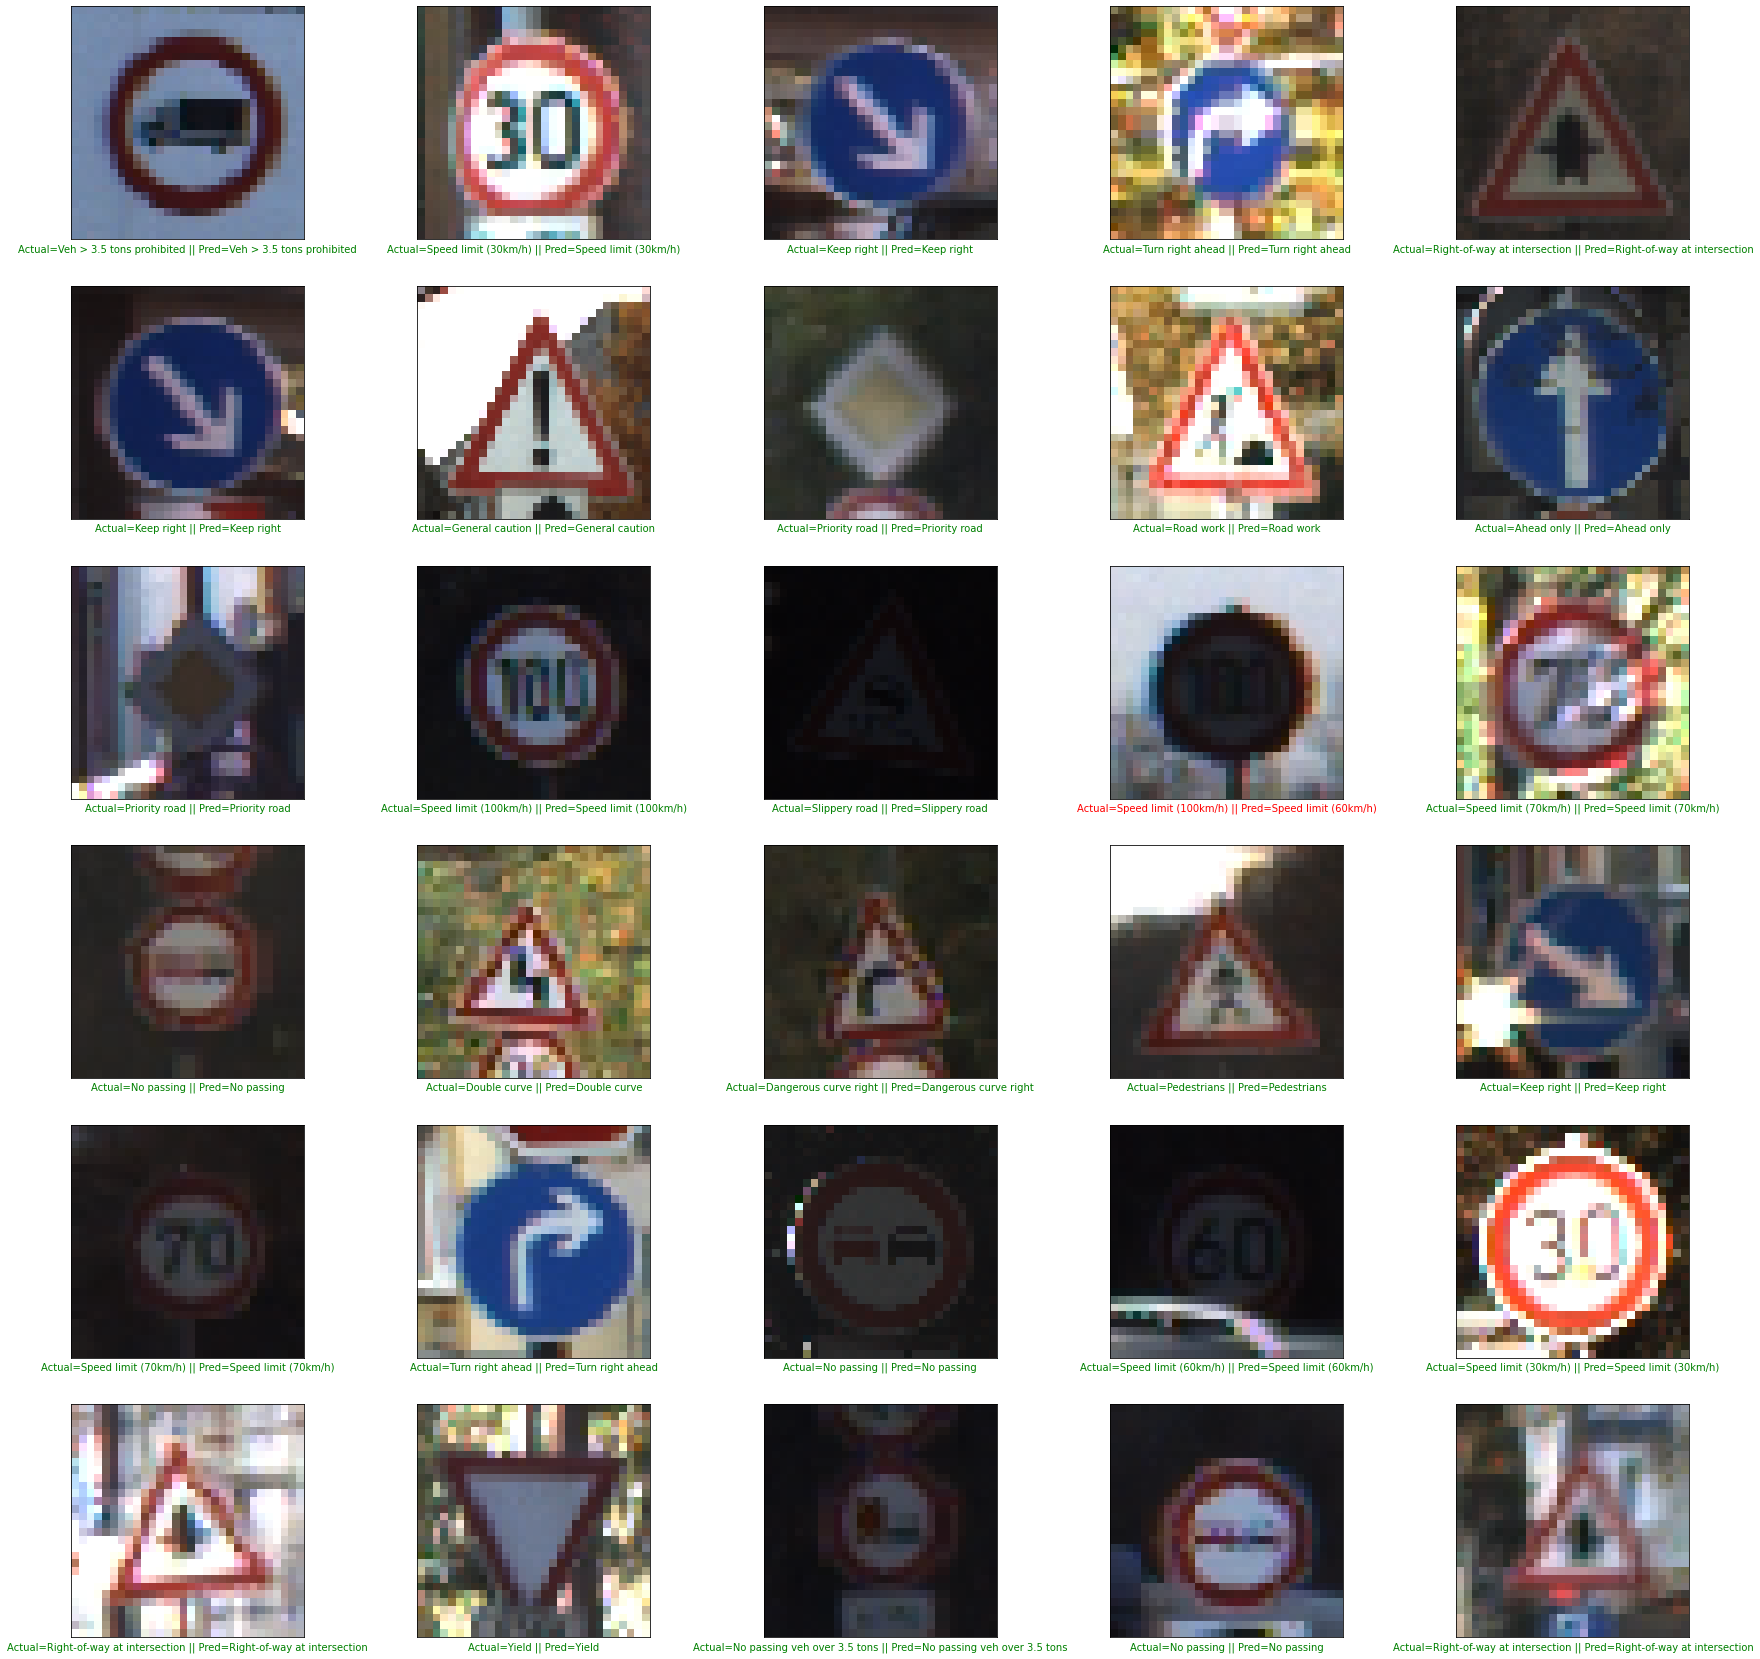

In [ ]:
plt.figure(figsize = (20, 20))

start_index = 0
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred2[start_index + i]
    actual = test_labels1[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

SVM


In [ ]:
from sklearn.svm import SVC
classifier6 = SVC(kernel = 'rbf', random_state = 0)
classifier6.fit(x_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_recall_fscore_support
y_pred1 = classifier6.predict(X_test1)
report1=precision_recall_fscore_support(Y_test,y_pred1)
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
print(accuracy_score(Y_test, y_pred1))
a1=accuracy_score(Y_test, y_pred1)
print(classification_report(Y_test, y_pred1))

[[ 44   4   0 ...   0   0   0]
 [  5 701   2 ...   0   1   0]
 [  0  15 715 ...   0   0   0]
 ...
 [  0   0   1 ...  84   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  89]]
0.9389548693586698
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        60
           1       0.95      0.97      0.96       720
           2       0.94      0.95      0.94       750
           3       0.88      0.92      0.90       450
           4       0.98      0.94      0.96       660
           5       0.88      0.89      0.89       630
           6       1.00      0.87      0.93       150
           7       0.93      0.84      0.88       450
           8       0.86      0.91      0.89       450
           9       0.97      0.97      0.97       480
          10       0.96      0.99      0.98       660
          11       0.92      0.96      0.94       420
          12       1.00      0.94      0.97       690
          13       0.99      0.9

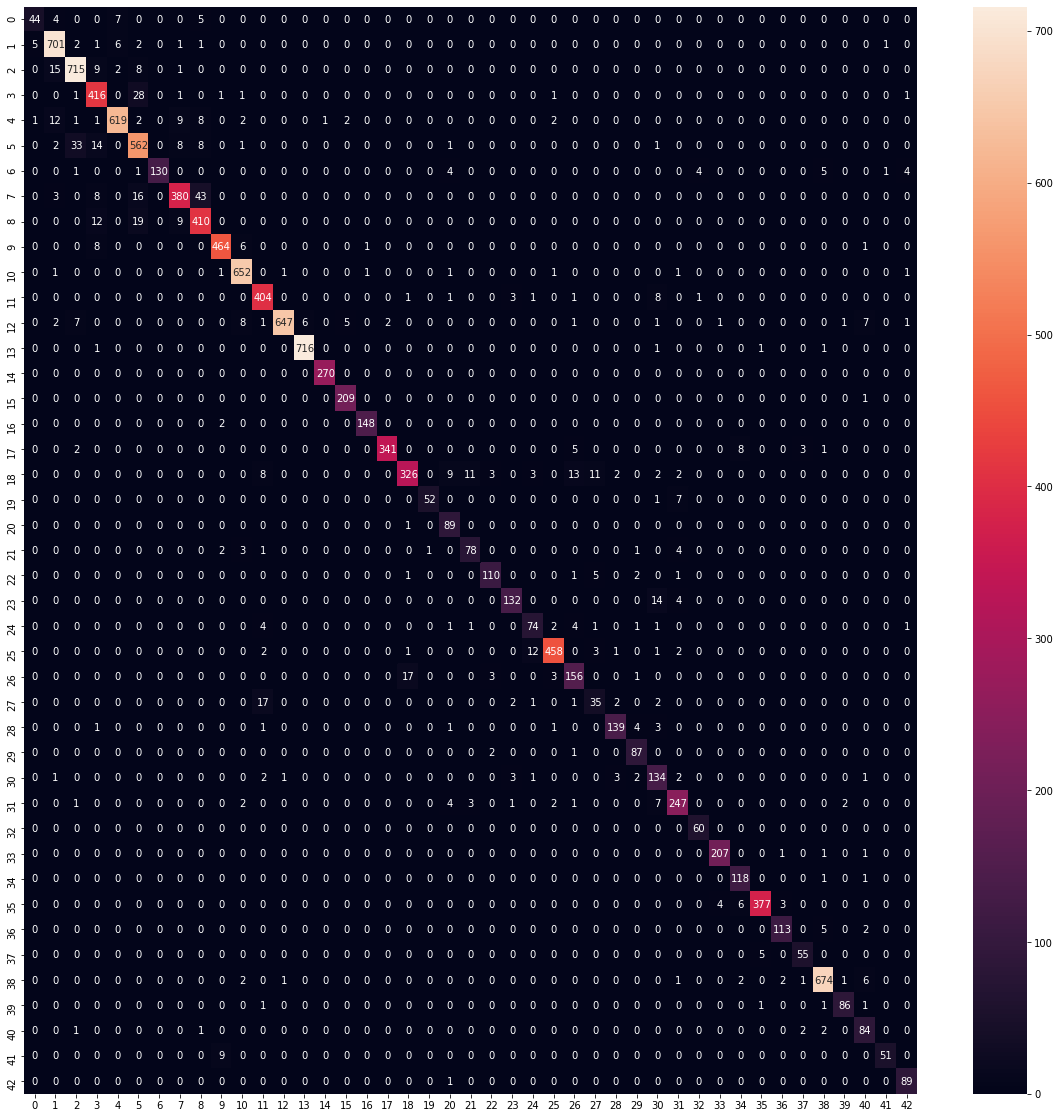

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
pred3=[]
for i in y_pred1:
  pred3.append(class_labels[i])

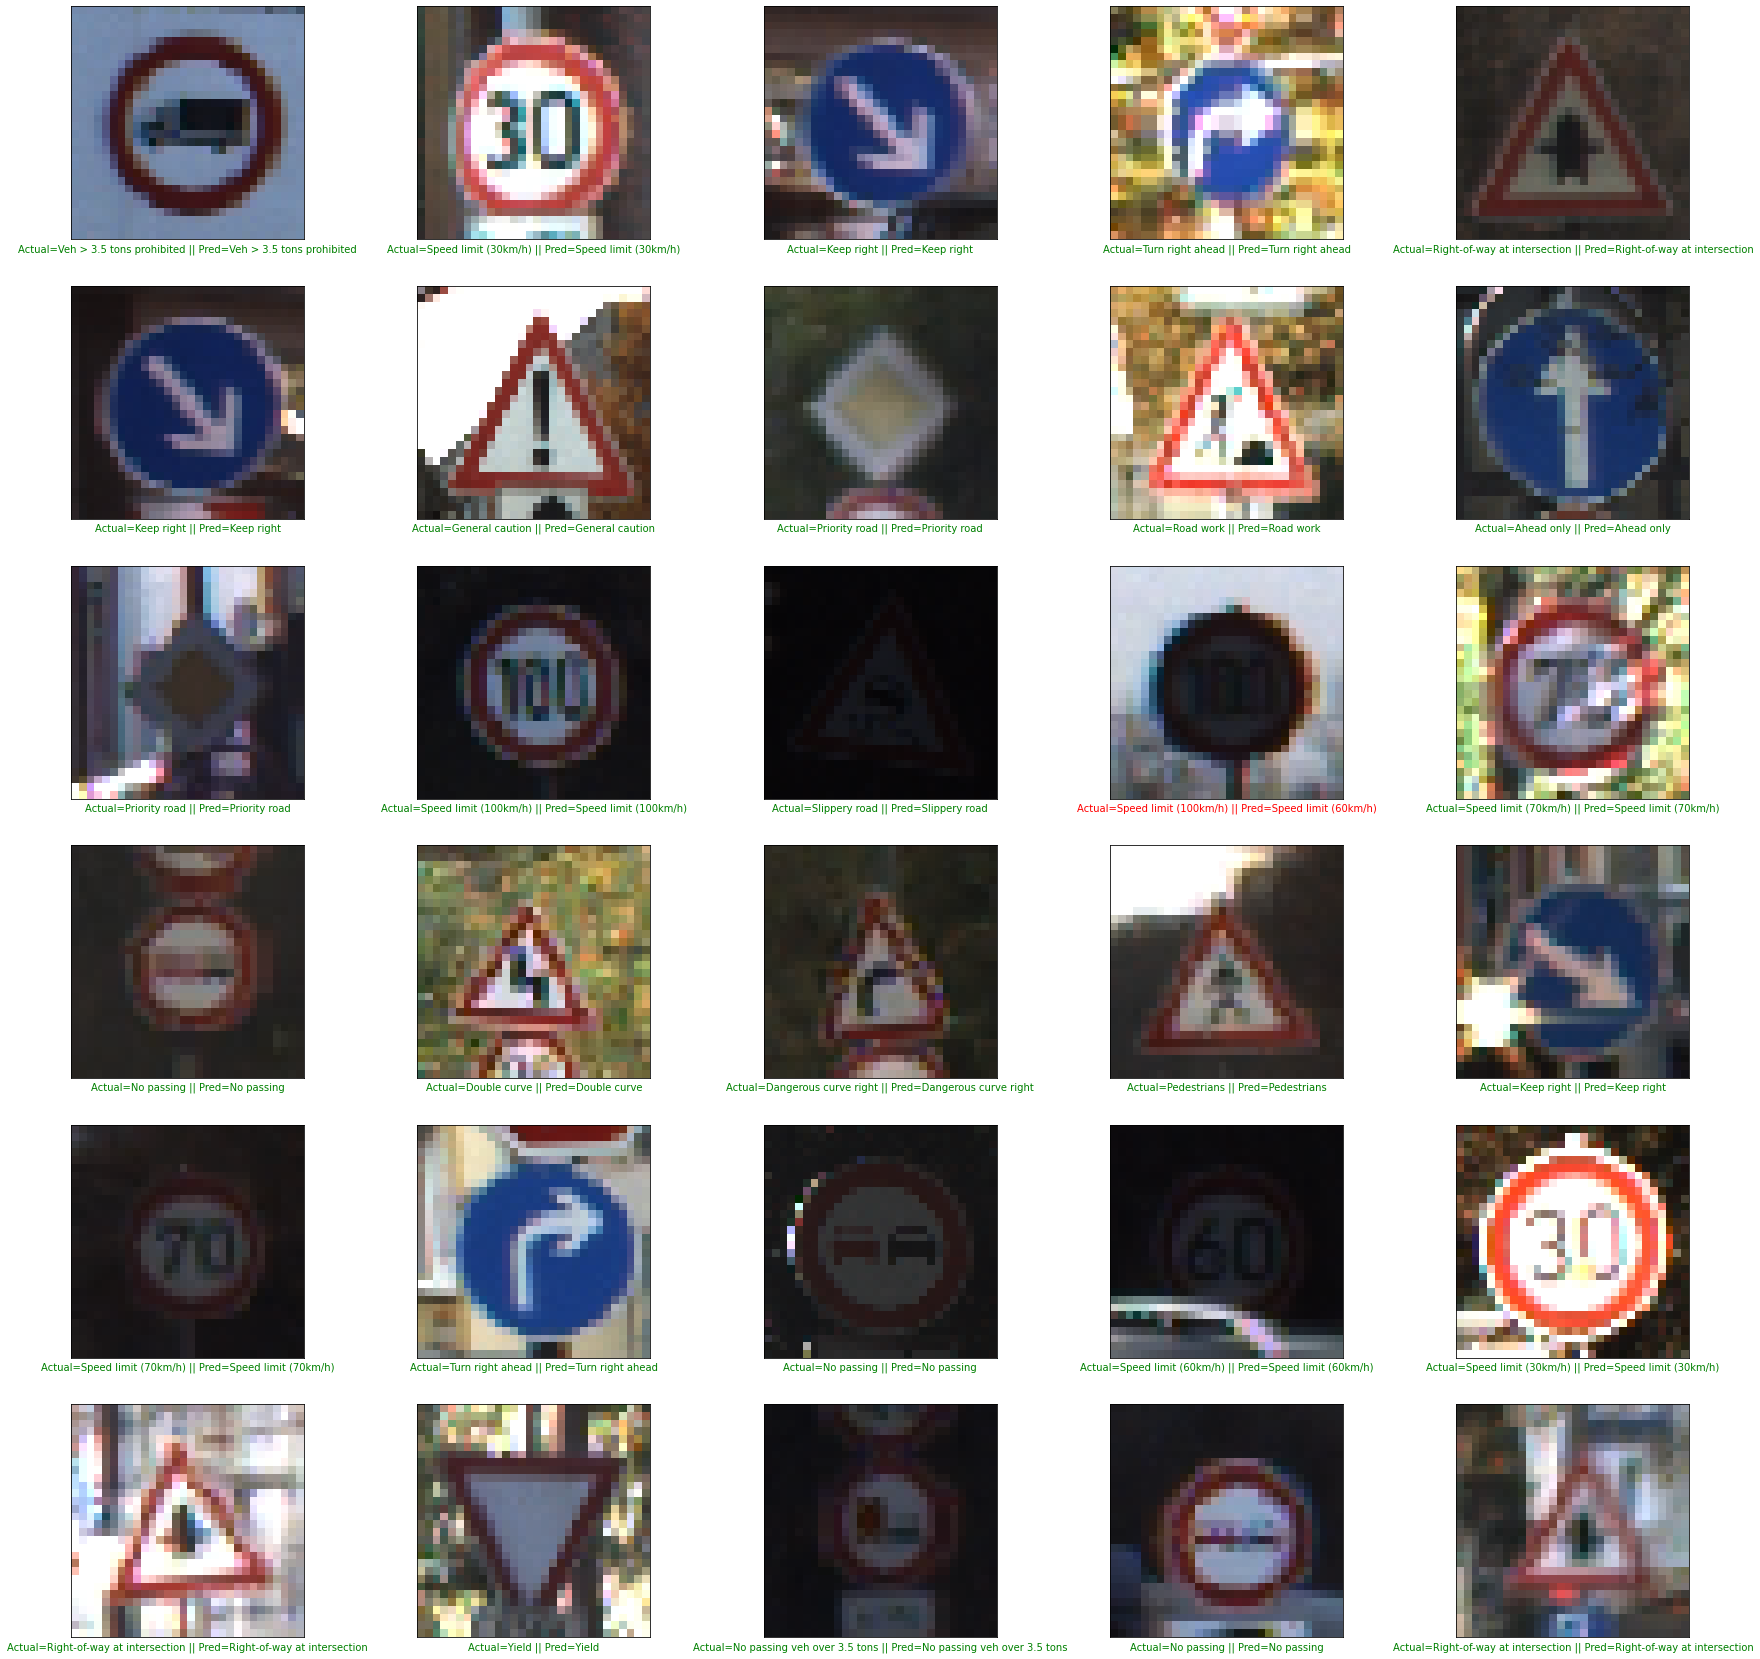

In [ ]:
plt.figure(figsize = (20, 20))

start_index = 0
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred3[start_index + i]
    actual = test_labels1[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()